In [23]:
# Import Library.
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline

# What is a DICOM Image File?

A DICOM image file is an outcome of the Digital Imaging and Communications in Medicine standard. Specifically, image files that are compliant with part 10 of the DICOM standard are generally referred to as “DICOM format files” or simply “DICOM files” and are represented as “.dcm.”

DICOM differs from other image formats in that it groups information into data sets. A DICOM file consists of a header and image data sets, all packed into a single file.

These data are stored as a long series of 0s and 1s, which can be reconstructed as the image by using the information from the header.

The DICOM medical file of a single patient consists of multiple images, all of which are of high resolution. Therefore, the file size can be quite large (for instance, a single CT scan can run up to 35 MB).

In [24]:
# Let read one Image
dicom_image = '../data/HopSo/1/123.141985598650870.1753247905930277/1.2.392.200036.9123.100.11.15225270322503594167203321619110075/1.2.392.200036.9123.100.11.15225270322503594167203322019110076.dcm'

In [25]:
# Read the file
dicom = pydicom.read_file(dicom_image)
dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9123.100.11.15225270322503594167203322019110076
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.5
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMBP_365'
(0002, 0016) Source Application Entity Title     AE: 'SCENARIA'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 620
(0008, 0005) Specific Character Set              CS: ''
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', '', 'POST_RECON']
(0008, 0012) Instance Creation Date              DA: '20221226'
(0008, 0013) Instance Cr

In [26]:
"""
Now lets apply the method apply_voi_lut available in pydicom package.

Apply a VOI lookup table or windowing operation to arr.
https://pydicom.github.io/pydicom/dev/reference/generated/pydicom.pixel_data_handlers.apply_voi_lut.html

There are other method and depending on the dataset type you may need to use apply_modality_lut() beforehand (When the dataset requires a modality LUT or rescale operation as part of the Modality LUT module then that must be applied before any windowing operation).
"""
data_voi = apply_voi_lut(dicom.pixel_array, dicom)
data_voi

array([[-4096., -4096., -4096., ..., -4096., -4096., -4096.],
       [-4096., -4096., -4096., ..., -4096., -4096., -4096.],
       [-4096., -4096., -4096., ..., -4096., -4096., -4096.],
       ...,
       [-4096., -4096., -4096., ..., -4096., -4096., -4096.],
       [-4096., -4096., -4096., ..., -4096., -4096., -4096.],
       [-4096., -4096., -4096., ..., -4096., -4096., -4096.]])

In [27]:
data = dicom.pixel_array
data

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

In [28]:
"""
Photometric Interpretation Attribute

Specifies the intended interpretation of the pixel data.
https://dicom.innolitics.com/ciods/vl-endoscopic-image/vl-image/00280004

Enumerated Values:
    MONOCHROME2
    RGB
    YBR_FULL_422
    YBR_PARTIAL_420
    YBR_RCT
    YBR_ICT
"""
dicom.PhotometricInterpretation

'MONOCHROME2'

In [29]:
# Normalize
data_voi = data_voi - np.min(data_voi)
data_voi = data_voi / np.max(data_voi)
data_voi = (data_voi * 255).astype(np.uint8)
data_voi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(512, 512)


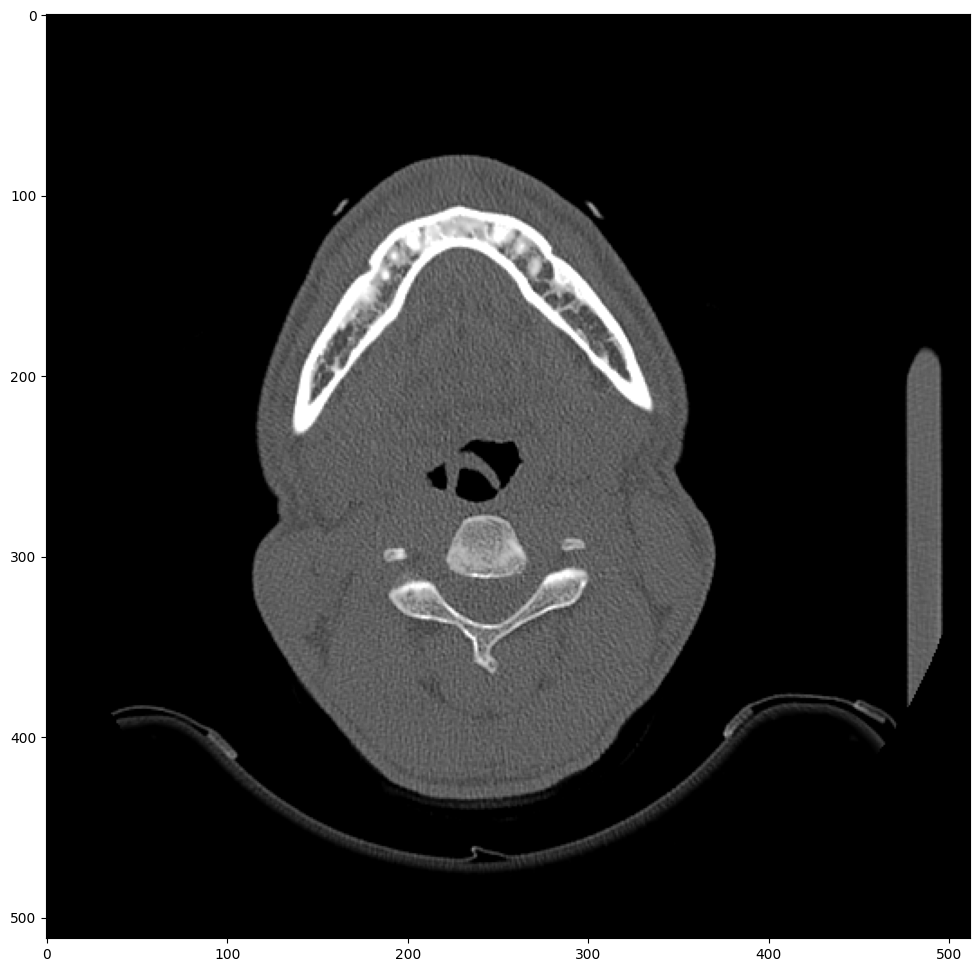

In [30]:
# Visualize
print(data_voi.shape)
plt.figure(figsize = (12,12))
plt.imshow(data_voi, 'gray')